In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import time as time
from datetime import datetime
from datetime import timedelta
#from shapely.geometry import Point
#from shapely.geometry.polygon import Polygon
#import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

#Load Data
fname='../../input_data/krill_net_data/CorrectMasterKrill.csv'
df1=pd.read_csv(fname)
df1['Ratio']=df1['T..SPINIFERA']/df1['KRILL_TOTAL']
df1['NET_IN_TIME']=pd.to_datetime(df1['NET_IN_TIME'], format='%m/%d/%y %H:%M')


loar=df1['KRILL_TOTAL']>=100
df2=df1[loar]
#dfout = pd.DataFrame(np.nan, index=range(0,4), columns=['A', 'B'])


In [17]:
import geopy.distance
#tm=df1.loc[0]['NET_IN_TIME']
#for yr in range (2003,2016)

d = timedelta(days=1)
md=timedelta(days=-1)
mindep=0
maxdep=300

dist=list()
diff=list()
t=time.time()
for yr in range (2002,2016):
    loar=(df2['NET_IN_TIME']>datetime.strptime('Jan 1 '+ str(yr) +' 12:01PM', '%b %d %Y %I:%M%p')) & \
    (df2['NET_IN_TIME']<datetime.strptime('Jan 1 '+ str(yr+1) +' 12:01PM', '%b %d %Y %I:%M%p'))

    idx=df2[loar]


    for i in idx.index:
        for j in idx.index:
            if ((idx.loc[i]['NET_IN_TIME']-idx.loc[j]['NET_IN_TIME'])<d) & ((idx.loc[i]['NET_IN_TIME']-idx.loc[j]['NET_IN_TIME'])>md):
                if ((idx.loc[i]['BOTTOM_DEPTH']>mindep) & (idx.loc[i]['BOTTOM_DEPTH']<maxdep)) & ((idx.loc[j]['BOTTOM_DEPTH']>mindep) & (idx.loc[j]['BOTTOM_DEPTH']<maxdep)):
                    #print(idx.loc[i]['NET_IN_TIME']-idx.loc[j]['NET_IN_TIME'])
                    #print(idx.loc[i]['BOTTOM_DEPTH'])
                    dist.append(geopy.distance.distance((idx.loc[i]['Lat'],idx.loc[i]['Long']),(idx.loc[j]['Lat'],idx.loc[j]['Long'])).km)
                    diff.append(abs(idx.loc[i]['Ratio']-idx.loc[j]['Ratio']))
                    
elapsed=time.time()-t
print(elapsed)

172.01139116287231


In [19]:
npdist=np.array(dist)
npdiff=np.array(diff)
mcc=list()
stdcc=list()
mdist=list()
n=list()
for j in range(0,200,5):
    loar=(npdist>j) & (npdist<=j+5)
    mcc.append(np.mean(npdiff[loar]))
    stdcc.append(np.std(npdiff[loar]))
    mdist.append(j+2.5)
    n.append(sum(loar))

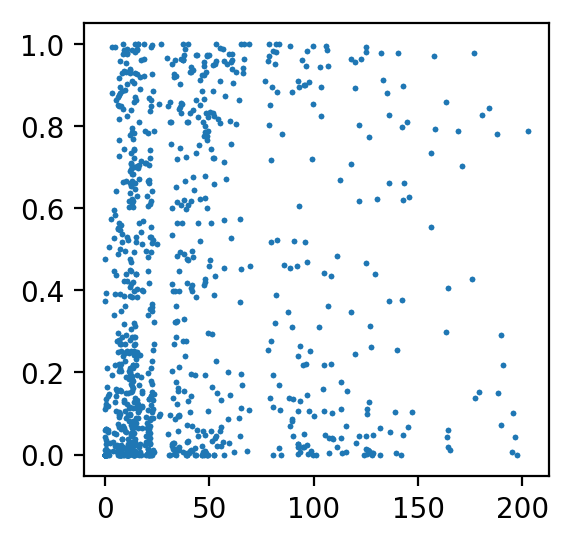

In [20]:
fig = plt.figure(figsize=(3,3),dpi=200)
ax = plt.axes()
ax.scatter(dist,diff,s=1)

In [23]:
finaldf = pd.DataFrame(
    {'Distance': mdist,
     'mean_CC': mcc,
     'std_CC': stdcc,
     'number_of_samples': n
    })
finaldf
fout='../../output_data/cc_analysis/cc_2day_300to700m_2002to20015.csv'
finaldf.to_csv (fout, index = False, header=True)



,Distance,mean_CC,std_CC,number_of_samples
0,2.5,0.191376,0.260443,104
1,7.5,0.336621,0.326175,220
2,12.5,0.333380,0.321651,346
3,17.5,0.385683,0.347057,136
4,22.5,0.314291,0.305604,168
5,27.5,0.587291,0.380801,12
6,32.5,0.362765,0.328469,96
7,37.5,0.489139,0.352336,102
8,42.5,0.448705,0.358182,70
9,47.5,0.532635,0.368173,92


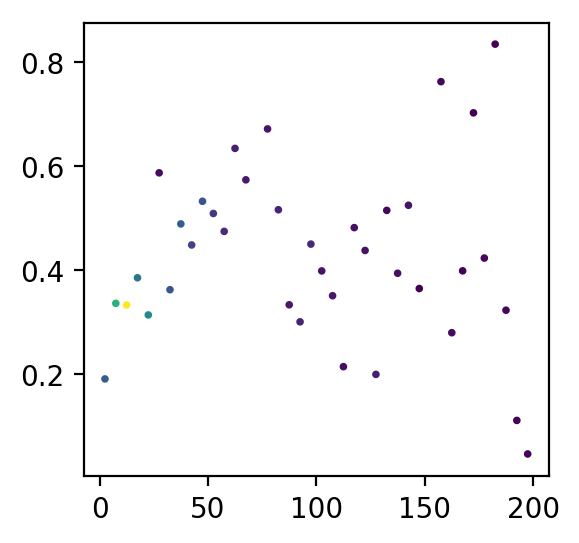

In [21]:
fig = plt.figure(figsize=(3,3),dpi=200)
ax = plt.axes()
ax.scatter(mdist,mcc,c=n,s=3)

In [33]:
loar=npdist==0
print(sum(loar))
print(len(npdist))
sum(n)
print(sum(n)+647)

647
2543
2541
